<a href="https://colab.research.google.com/github/yain22/Theory-of-Linear-Models-in-R-and-Python/blob/master/Experimenting_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimenting Simple Linear Regression

Given $n$ number of paired observations $\{(x_i,y_i)\}_{i=1}^{n}$, simple linear regression is fomulated with 
\begin{align}
y_i = \alpha + \beta x_i + \epsilon_i, \quad  \epsilon_i \sim N(0,\sigma^2).
\end{align}



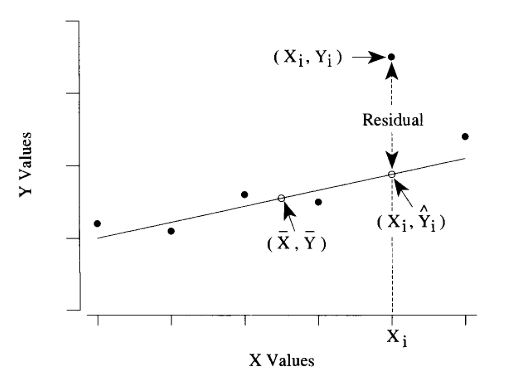

## Estimators for the parameters are
\begin{align}
\widehat{\beta} & = \frac{\sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^{n}(x_i - \bar{x})^2},\\
\widehat{\alpha} & = \bar{y} - \widehat{\beta} \bar{x},\\
\widehat{\sigma^2} &= SS_{y|x}  = \frac{1}{n-2} \sum_{i=1}^{n}(y_i - ( \widehat{\alpha} + \widehat{\beta} x_i) )^2 = \frac{1}{n-2} \sum_{i=1}^{n}\widehat{e}_i^2.
\end{align}

This means that 


1.   Estimate of the slope $\widehat{\beta}$ is determined by (a) sample covariance between $x$ and $y$ and (b) variance of $x$;
2.   Fitted regression line passes through the point $(\bar{x},\bar{y})$ because $\bar{y} = \widehat{\alpha} + \widehat{\beta} \bar{x}$;
3.   Degree of freedom for Error $SS_{y|x}$ is $n-2$, where it loses the two degree of freedom in esimating $\alpha$ and $\beta$.


## Sampling distribution of $\widehat{\beta}$

---

**[Theorem]** Given that $\sigma^2$ is known, the estimated slope $\widehat{\beta}$ is distributed with
$$
\widehat{\beta} = 
\frac{\sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
 \sim N\bigg(\beta, \frac{\sigma}{\sum_{i=1}^{n}(x_i - \bar{x})^2} \bigg).
$$

After standardizing, 
$$
Z = Z (\{(x_i,y_i)\}_{i=1}^n, \beta)=
\frac{\widehat{\beta} - \beta}{\sigma\bigg/\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}} \sim N(0,1).
$$

---


*   Stochastic (randomness) of the $\widehat{\beta}$ comes from the responses $y_i \, (i=1,\cdots,n)$ NOT from predictors $x_i \, (i=1,\cdots,n)$.
*   Most of times, $\sigma^2$ is unknown, hence, the **[Theorem]** is not useful.
*   Instead, the following is useful (most of built-in statistical software based on the following argument), which is obtained by substituting $
 \widehat{\sigma} = 
 \sqrt{\frac{1}{n-2} \sum_{i=1}^{n}\widehat{e}_i^2}$ in the place of $\sigma$.


---

**[Corollary]** The estimated slope $\widehat{\beta}$ is distributed with
$$
T = T (\{(x_i,y_i)\}_{i=1}^n, \beta)=
\frac{\widehat{\beta} - \beta}{\widehat{\sigma}\bigg/\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}}
=
\frac{\widehat{\beta} - \beta}{
  \sqrt{\frac{1}{n-2} \frac{\sum_{i=1}^{n}\widehat{e}_i^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2} } }
 \sim t_{n-2}.
  $$

---


Theoretically, both of the $Z = Z (\{(x_i,y_i)\}_{i=1}^n, \beta)$ and
$T = T (\{(x_i,y_i)\}_{i=1}^n, \beta)$ are pivotal qauntities because their sampling distributions do not depend on the parameter $\beta$. 




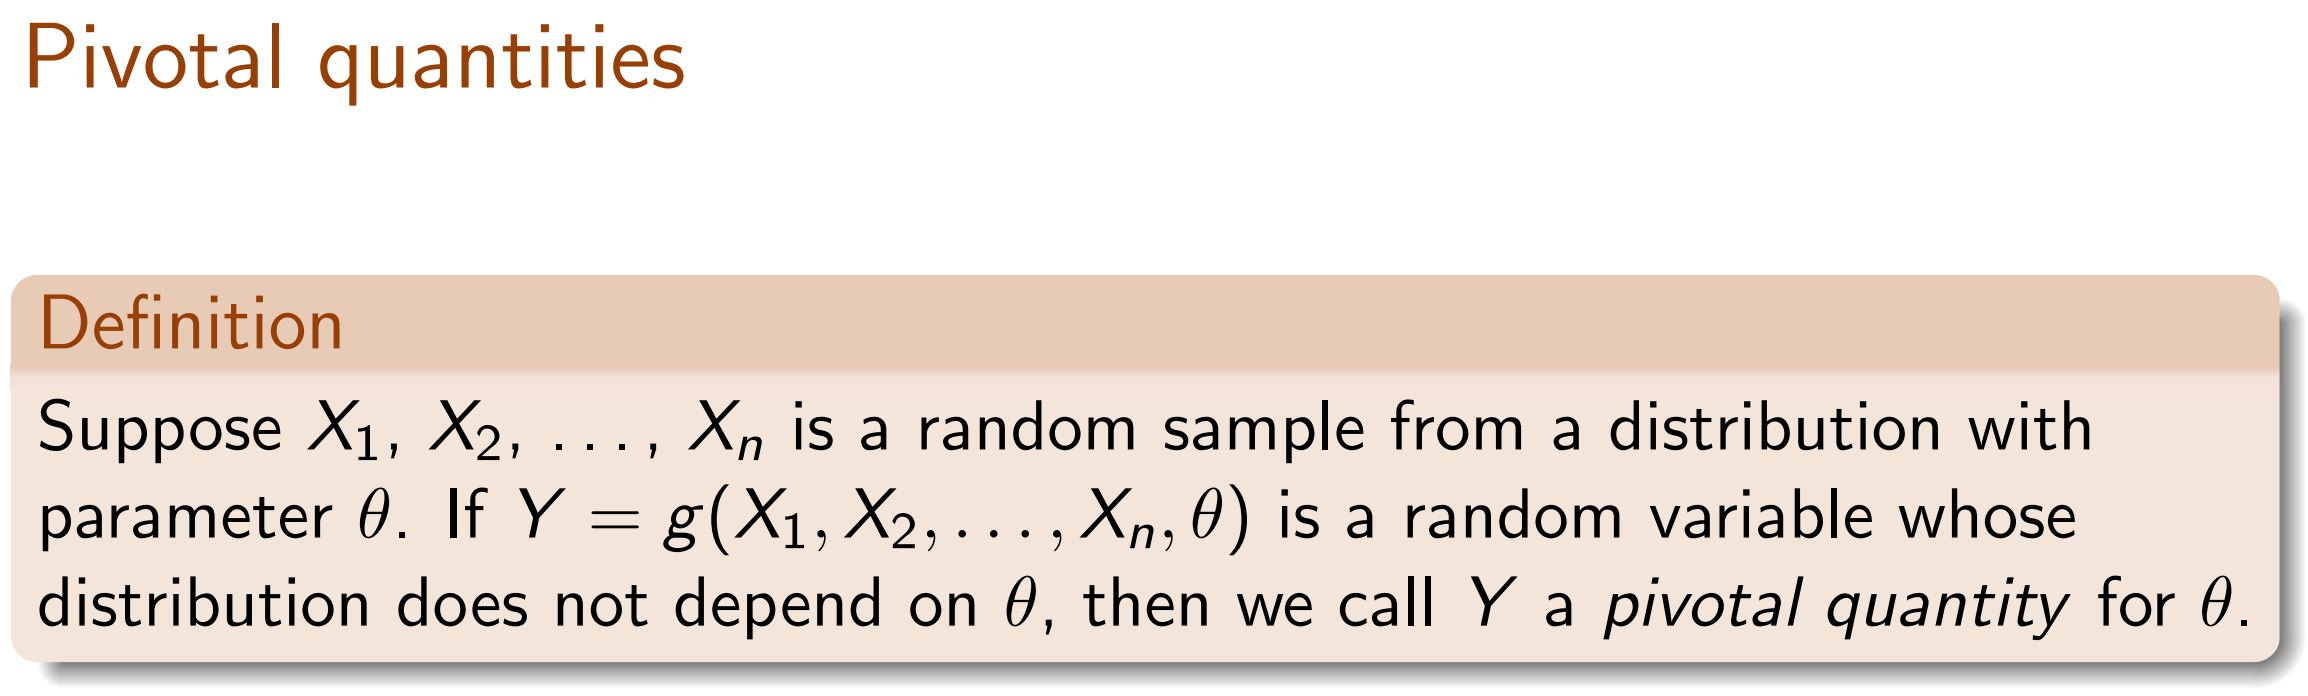

## Hypothesis testing for the slope

Consider the following hypothesis test


*   $\text{H}_0: \beta = \beta_0  $ vs. $\text{H}_a: \beta \neq \beta_0$.

Given that $\text{H}_0$ is true, the **[Corollary]** states that
$$
T  = 
T (\{(x_i,y_i)\}_{i=1}^n, \beta_0) =
\frac{\widehat{\beta} - \beta_0}{\widehat{\sigma}\bigg/\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}}
 \sim t_{n-2}.
$$

Once we observed the data $\{(x_i,y_i)\}_{i=1}^n$, then we can obtain a FIXED value for the $T  = 
T (\{(x_i,y_i)\}_{i=1}^n, \beta_0)$.

The $p$-value can be calculated via 
\begin{align}
&P[T < - T (\{(x_i,y_i)\}_{i=1}^n, \beta_0) \text{ or }
T > T (\{(x_i,y_i)\}_{i=1}^n, \beta_0)| H_0 \text{ is true}]\\
&=
P[ T > |T (\{(x_i,y_i)\}_{i=1}^n, \beta_0)|| H_0 \text{ is true}]
.
\end{align}
In calculating the $p$-value, $T$ is the random quantity distributed under the null distribution, that is, $T \sim t_{n-2}$.

 




In [ ]:
install.packages("mvtnorm"); library("mvtnorm")

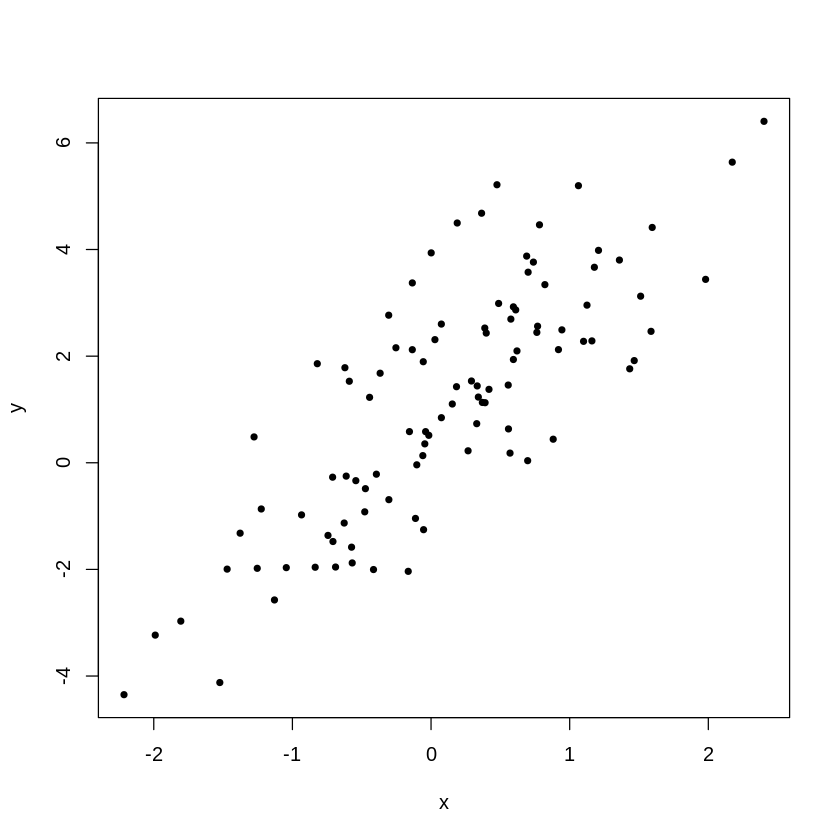

In [91]:
# Experiment
set.seed(1)
n = 100 # number of samples
beta_0 = 2 # true slope
alpha_0 = 1 # true intercept
sigma_0_sq = 2 # true measurement error
sd.x = 1 # standard deviation for the covariate

x = rnorm(n, sd = sd.x) # covariate
y = c(rmvnorm(n = 1, mean = alpha_0 + x*beta_0 , sigma = sigma_0_sq*diag(n)))

plot(x, y, pch = 20)

## Testing $\text{H}_0: \beta = 0  $ vs. $\text{H}_a: \beta \neq 0$

### Using R built-in function lm()


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6543 -0.8680 -0.1973  0.7628  3.3180 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.9467     0.1372   6.902 5.12e-10 ***
x             1.9985     0.1523  13.118  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.362 on 98 degrees of freedom
Multiple R-squared:  0.6371,	Adjusted R-squared:  0.6334 
F-statistic: 172.1 on 1 and 98 DF,  p-value: < 2.2e-16


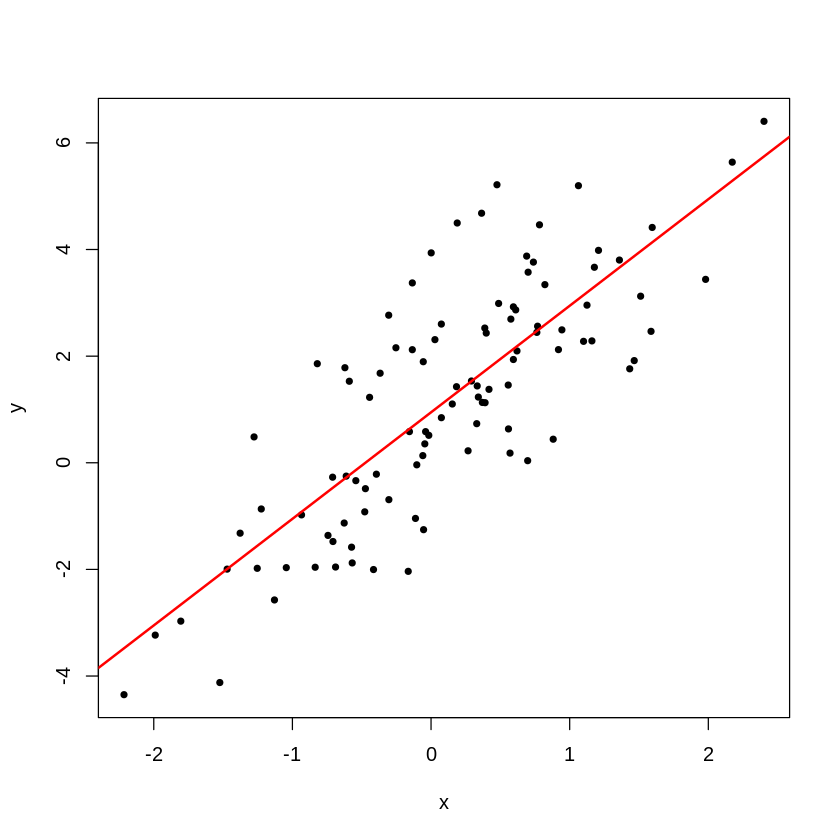

In [98]:

res_1 = lm(formula = y ~ x)
ols_fit_1 = summary(res_1)

plot(x, y, pch = 20)
abline(a = res_1$coefficients[1], b = res_1$coefficients[2], lwd = 2, col = "red"  ) 
ols_fit_1

### Manually calculation

In [108]:
beta_hat = function(x,y){
  nomi = cov(x,y)
  denom = var(x)
  res = nomi/denom
  return(res)
}

alpha_hat = function(x,y){
  res = mean(y) - beta_hat(x = x, y = y)*mean(x)
  return(res)
}

sigma_hat = function(x,y){
  res = sqrt((sum((y - (alpha_hat(x,y)+beta_hat(x = x, y = y)*x))^2))/(n-2)) 
  return(res)
}

t_test_ft = function(x,y,beta_0){
  
  nomi = beta_hat(x = x, y = y) - beta_0
  denom = sigma_hat(x = x, y = y)/sqrt(sum( (x - mean(x))^2))
  res = nomi/denom
  return(res)
}

stand_err_beta = function(x,y){
  res = sigma_hat(x = x, y = y)/sqrt(sum( (x - mean(x))^2))
  return(res)
}

# These values are exactly the same as the Table using lm(.)
beta_hat(x = x, y = y)
stand_err_beta(x = x, y = y)
alpha_hat(x = x, y = y)
sigma_hat(x = x, y = y)
t_test_ft(x = x, y = y, beta_0 = 0)

2*pt(q = abs(t_test_ft(x = x, y = y, beta_0 = 0)) , lower.tail = FALSE, df = n-2 )

[1] 1.9985

[1] 0.152349

[1] 0.9466946

[1] 1.361539

[1] 13.11791

[1] 2.67701e-23

## Testing $\text{H}_0: \beta = \beta_0  $ vs. $\text{H}_a: \beta \neq \beta_0$ when $\beta_0 \neq 0$.

In this case, the non-zero hypothetical slope $\beta_0$ is SPECIFIED by experimenter, saying $\beta_0 = 12$.

### Using R built-in function lm()

- Source: [Click](https://rstudio-pubs-static.s3.amazonaws.com/266487_6c2cd4692cda47419c1f6762458cade6.html)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6543 -0.8680 -0.1973  0.7628  3.3180 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.9467     0.1372   6.902 5.12e-10 ***
x             1.9985     0.1523  13.118  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.362 on 98 degrees of freedom
Multiple R-squared:  0.6371,	Adjusted R-squared:  0.6334 
F-statistic: 172.1 on 1 and 98 DF,  p-value: < 2.2e-16


[1] 8.194223e-83

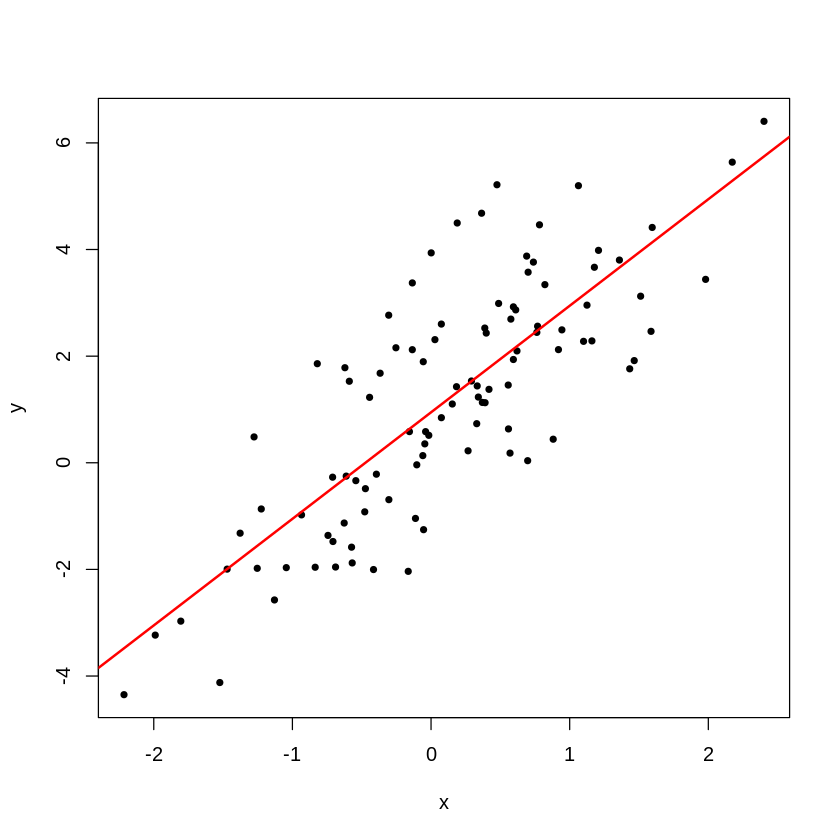

In [109]:
res_1 = lm(formula = y ~ x)
ols_fit_1 = summary(res_1)

plot(x, y, pch = 20)
abline(a = res_1$coefficients[1], b = res_1$coefficients[2], lwd = 2, col = "red"  ) 

ols_fit_1
# Specifiy beta_0 
beta_0 = 12

# Estimated beta_hat
beta_hat_lm = ols_fit_1$coefficients[2]

# Standard error of the beta_hat (slope)
se_beta_hat_lm = ols_fit_1$coefficients[2,"Std. Error"]

# t statistic with beta_0 = -1, our a priori slope assumption
t_value_lm = (beta_hat_lm - beta_0) / se_beta_hat_lm

# calculate two-sided p-value, degrees of freedom = n - 2
p_value_lm = 2*pt(abs(t_value_lm),lower.tail = FALSE, df=n-2)
p_value_lm

### Manually calculation

In [116]:
# These values are exactly the same as the Table using lm(.)
#beta_hat(x = x, y = y)
#stand_err_beta(x = x, y = y)
#alpha_hat(x = x, y = y)
#sigma_hat(x = x, y = y)
#t_test_ft(x = x, y = y, beta_0 = beta_0)

p_value_manual = 2*pt(q = abs(t_test_ft(x = x, y = y, beta_0 = beta_0)) , lower.tail = FALSE, df = n-2 )

print(paste("p-value obtained by lm() is ",p_value_lm) ) 
print(paste("p-value obtained by manual calculation is ",p_value_manual)) 

[1] "p-value obtained by lm() is  8.19422319251956e-83"
[1] "p-value obtained by manual calculation is  8.19422319251956e-83"


## 

# About $p$-value calculation (general):

The $p$-value is a measure of discrepancy of the fit of a model under certain “null hypothesis” (denoted by $H_0$) to data $y$ with a lower value indicating a stronger discrepancy, thereby, supporting the alternative hypothesis true.


1.   Suppose that the data $y$ is generated from a density $y \sim p_{\theta}$ indexed by the parameter $\theta$.
2.   Setup the hypothesis tests such that the data $y$ shall be either generated from 
\begin{align}
H_0: \quad y \sim p_{\theta_0};\\
H_a: \quad y \sim p_{\theta_a}.
\end{align}
(Actually, in calculating the $p$-value, none of information from altenative hypothesis is used. The value $\theta_a$ is used in calculation of the power or Type II error given a specified value for the $\theta_a$.)
3.   To calculate the $p$-value, we need to first construct a test statistics $T(y,\theta)$ which is a pivotal quantity. That is, $T(y,\theta)$ is distributed according to a distribution, saying $g$, but the distribution $g$ should not be index via $\theta$, our target parameter.

\begin{align}
T(y,\theta) \sim g \text{ and } g \text{ is not indexed by the } \theta.
\end{align}

4.   Particulary, to get the $p$-value, what actually we need to know is 


\begin{align}
T(y,\theta_0) \sim g \text{ and } g \text{ is not indexed by the } \theta.
\end{align}


> However, because $T(y,\theta_0)$ is a pivotal qauntity, (i) the distribution $g$ such that $T(y,\theta) \sim g$ and (ii) the distribution $g$ such that $T(y,\theta_0) \sim g$ are the same.

5.  Assume that we constucted a test statistics $T(y)$ in a way that a higher value for $T(y)$ indicates a stronger evidence for the alternative hypothesis. 

6.  Finally, once we observed the data $y^{\text{obs}}$ which we denote the superscript to emphasize that the $y^{\text{obs}}$ has been `observed', the mathematical definition of the $p$-value is 

\begin{align}
P[
T(y,\theta_0)
>
T(y^{\text{obs}},\theta_0)
|H_0
]
.
\end{align}

> In this calculation, $T(y^{\text{obs}},\theta_0)$ is fixed, whereas the $T(y,\theta_0)$ is random and distributed according to $g$.


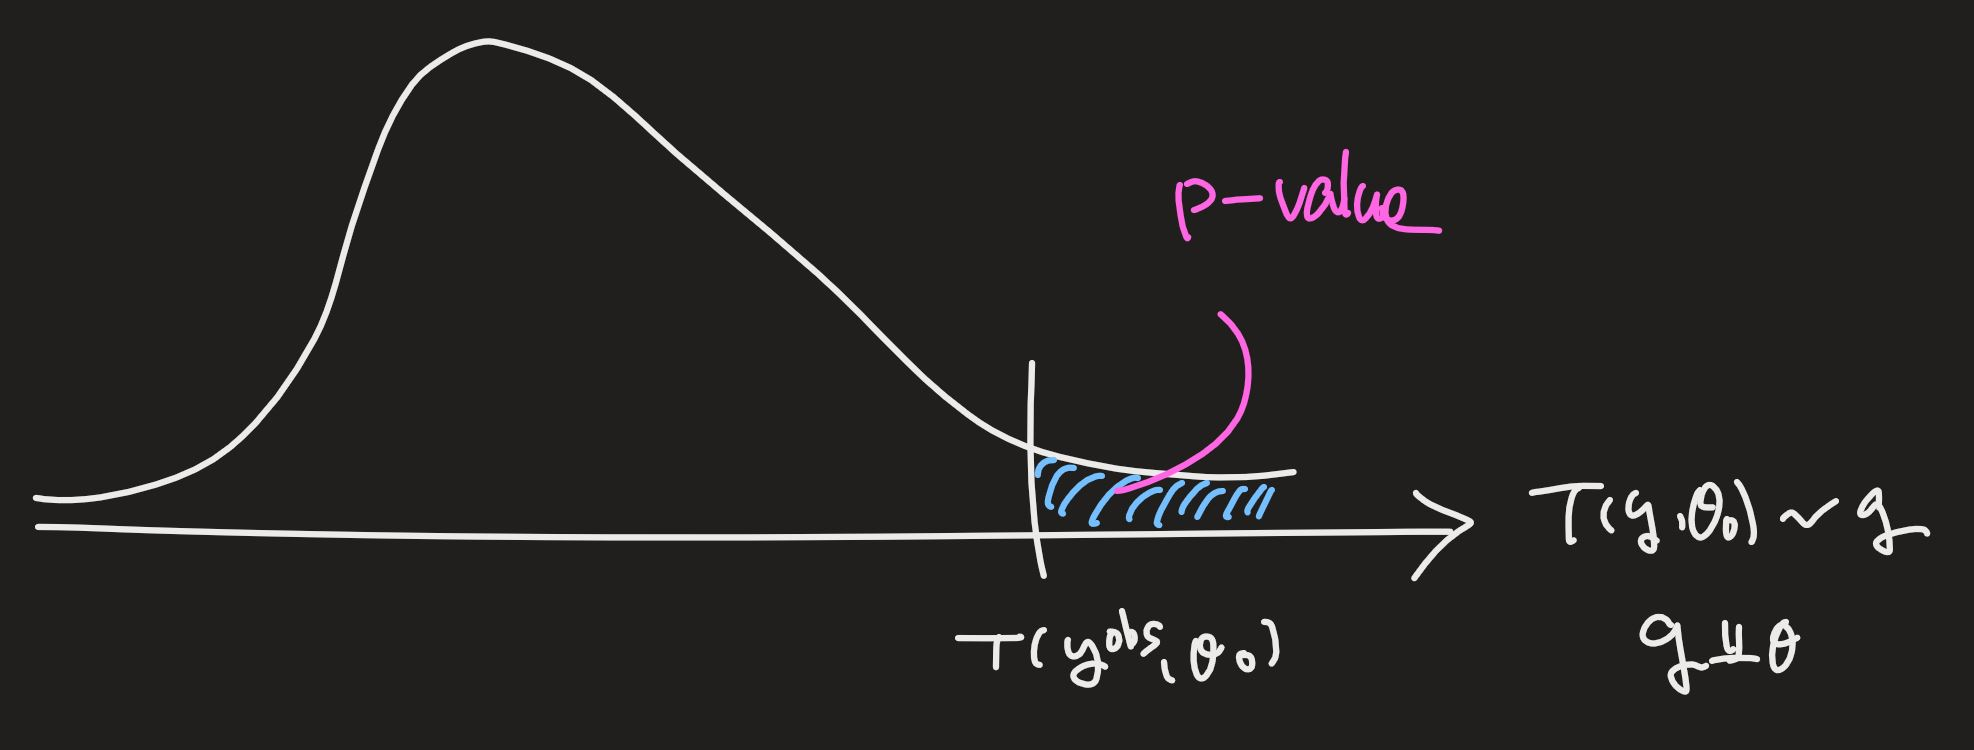

References


1.   p. 219 Introduction to Linear Models and Statistical Inference, S J. Janke

2.   p-values and statistical practice, Andrew Gelman, [Click](http://www.stat.columbia.edu/~gelman/research/published/pvalues3.pdf)


Similar websites

1.   [Click](https://rstudio-pubs-static.s3.amazonaws.com/266487_6c2cd4692cda47419c1f6762458cade6.html)

